In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

C:\Users\HARI\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('Dataset_1.csv')

In [5]:
data

,Hashtag,Year,Tweet_Count,Peak_Month,Sentiment,Location,Engagement,Event Trigger
0,#IPL2024,2024,"14,00,000",April,Positive,Pan-India,15K,IPL Season Start
1,#LokSabhaElections2024,2024,"13,00,000",May,Mixed,Pan-India,10K,Election Results
2,#Kalki2898AD,2024,"8,00,000",June,Positive,Telangana/AP,12K,Movie Release
3,#BanWaqfBoard,2024,"4,00,000",February,Negative,North India,5K,Waqf Controversy
4,#TeamIndia,2024,"9,00,000",June,Positive,Pan-India,11K,T20 WC Win
...,...,...,...,...,...,...,...,...
191,#Lockdown,2021,"1,40,000",May,Negative,Pan-India,3K,Second Wave Lockdown
192,#IndiaWithArnab,2021,"1,30,000",November,Mixed,Urban India,4K,Arnab Goswami Support
193,#GaneshChaturthi,2021,"1,20,000",September,Positive,Maharashtra,3K,Festival
194,#StopAsianHate,2021,"1,10,000",March,Positive,Urban India,3K,BTS Campaign Support


# Data Overview

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hashtag        196 non-null    object
 1   Year           196 non-null    int64 
 2   Tweet_Count    196 non-null    object
 3   Peak_Month     196 non-null    object
 4   Sentiment      196 non-null    object
 5   Location       196 non-null    object
 6   Engagement     196 non-null    object
 7   Event Trigger  196 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.4+ KB


In [7]:
data.describe()

,Year
count,196.000000
mean,2022.500000
std,1.120897
min,2021.000000
25%,2021.750000
50%,2022.500000
75%,2023.250000
max,2024.000000


In [8]:
data.isnull().sum()

Hashtag          0
Year             0
Tweet_Count      0
Peak_Month       0
Sentiment        0
Location         0
Engagement       0
Event Trigger    0
dtype: int64

# Time Series

Sample Tweet_Count Values:
0    1400000
1    1300000
2     800000
3     400000
4     900000
Name: Tweet_Count, dtype: int64
Grouped Data (Monthly Counts):
Peak_Month  January  February    March    April      May     June     July  \
Year                                                                         
2021        4300000   1280000   920000  3680000  1240000  1150000   830000   
2022        1130000   1520000  1300000  2240000   750000  1720000   140000   
2023        1850000    880000  2200000   420000  2050000  1580000   300000   
2024        2180000   1000000  1230000  1580000  1900000  4000000  1350000   

Peak_Month   August  September  October  November  December  
Year                                                         
2021        1840000     620000  2850000   1130000    100000  
2022        1200000    1910000  1850000    850000    700000  
2023        2120000    2580000  1100000   3200000   1500000  
2024         830000     500000  1450000    400000    700000  


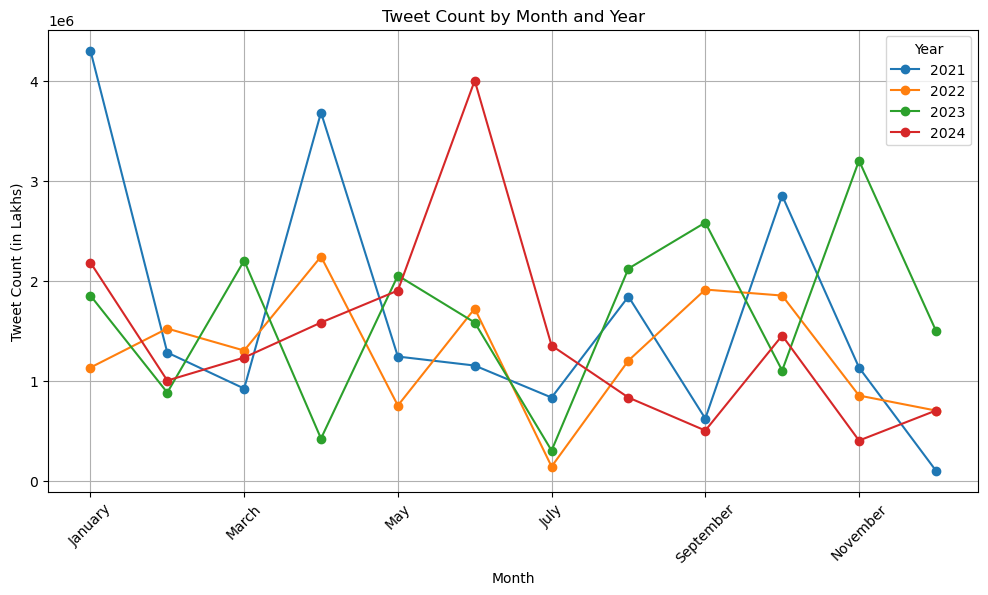

In [9]:
# 4. Time-Series (Fixed)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
data['Peak_Month'] = pd.Categorical(data['Peak_Month'], categories=month_order, ordered=True)

# Converting Tweet_Count to numeric, handle commas
data['Tweet_Count'] = data['Tweet_Count'].replace({',': ''}, regex=True)  # Removing commas
data['Tweet_Count'] = pd.to_numeric(data['Tweet_Count'], errors='coerce')

# Checking Tweet_Count values
print("Sample Tweet_Count Values:")
print(data['Tweet_Count'].head())

# Group by Year and Peak_Month, sum Tweet_Count
monthly_counts = data.groupby(['Year', 'Peak_Month'])['Tweet_Count'].sum().unstack()

#Checking grouped data
print("Grouped Data (Monthly Counts):")
print(monthly_counts)

 
monthly_counts.T.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Tweet Count by Month and Year')
plt.xlabel('Month')
plt.ylabel('Tweet Count (in Lakhs)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.show()

# Tweet Count vs Engagement(Likes, Shares and More)

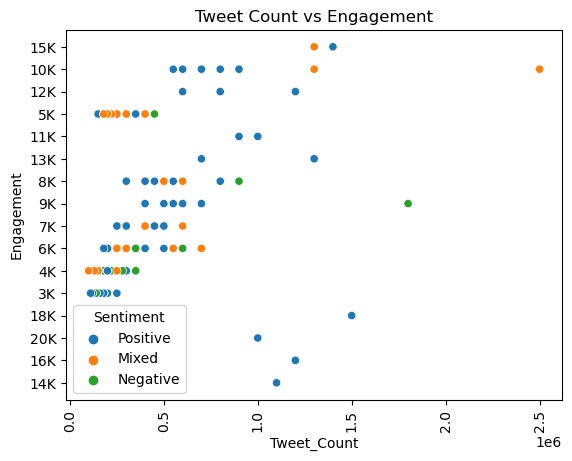

In [10]:

sns.scatterplot(x='Tweet_Count', y='Engagement', hue='Sentiment', data=data)
plt.title('Tweet Count vs Engagement')
plt.xticks(rotation=90) 
plt.show()

# TRENDING HASTAGS SENTIMENTS ACROSS YEARS

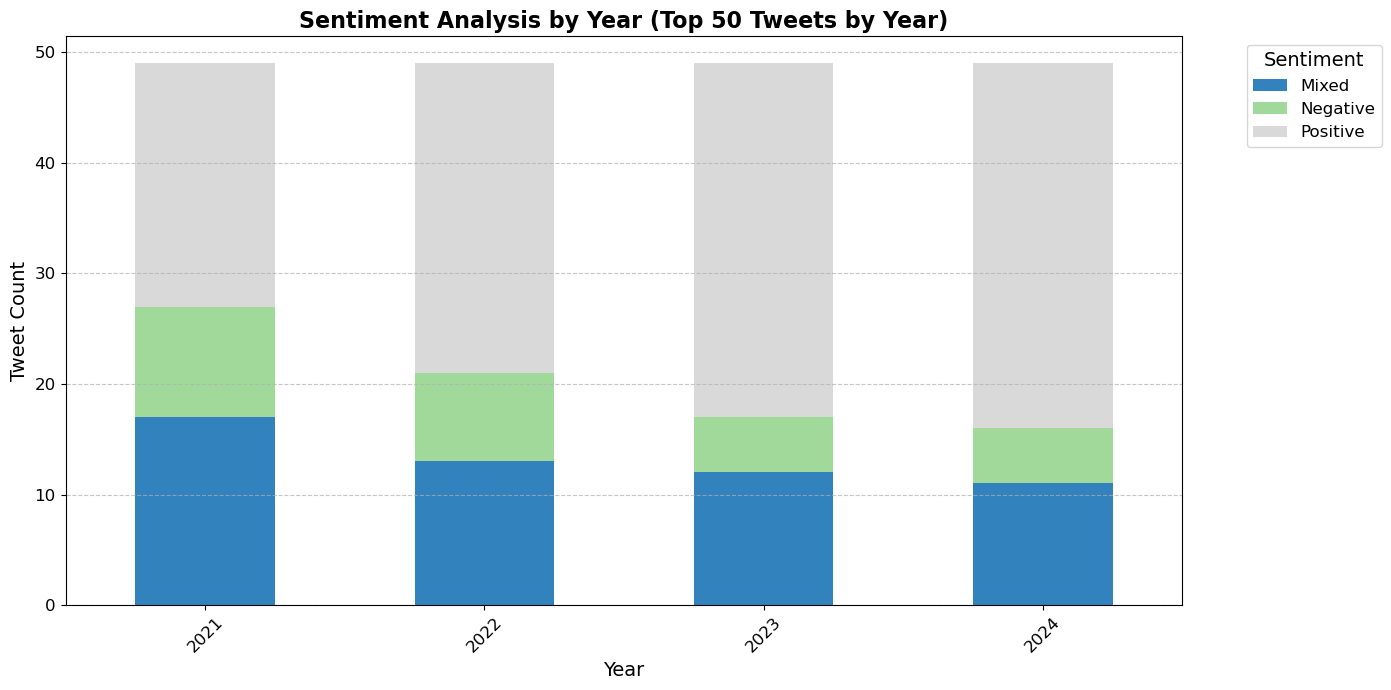

In [10]:
# # 4. Sentiment Analysis by Year

sentiment_counts = data.groupby(['Year', 'Sentiment']).size().unstack()


plt.figure(figsize=(14, 7))  
sentiment_counts.plot(
    kind='bar',
    stacked=True,
    colormap='tab20c', 
    ax=plt.gca()  
)


plt.title('Sentiment Analysis by Year (Top 50 Tweets by Year)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tweet Count', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  


plt.legend(title='Sentiment', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()


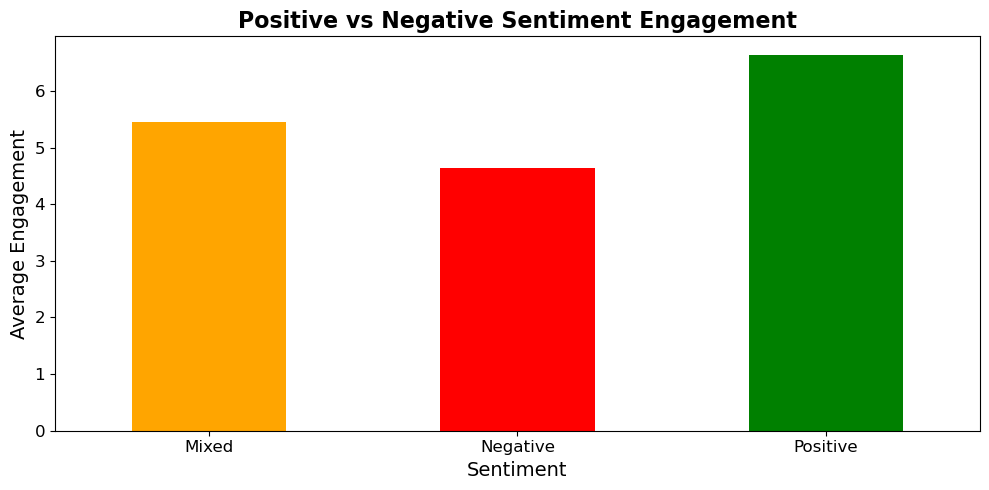

In [11]:
#6

def convert_engagement(value):
    if isinstance(value, str):
        value = value.upper().replace('K', '')  #
        try:
            return float(value) * 1000 if 'K' in value else float(value)
        except ValueError:
            return None  
    return value

data['Engagement'] = data['Engagement'].apply(convert_engagement)


data = data.dropna(subset=['Engagement'])

sentiment_engagement = data.groupby('Sentiment')['Engagement'].mean()




bar_colors = {'Positive': 'green', 'Negative': 'red', 'Mixed': 'orange'}

# Plot with customized bar colors
plt.figure(figsize=(10, 5))
sentiment_engagement.plot(kind='bar', color=[bar_colors[sentiment] for sentiment in sentiment_engagement.index])
plt.title('Positive vs Negative Sentiment Engagement', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Average Engagement', fontsize=14)
plt.grid(axis='y', linestyle='', alpha=0.5)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()










  # REASON FOR TWEETS

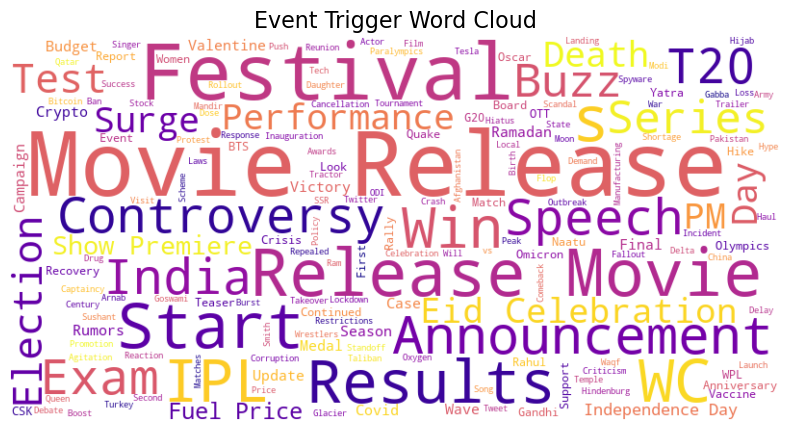

In [11]:

# wordcloud
text = ' '.join(data['Event Trigger'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)


plt.figure(figsize=(10, 5))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Event Trigger Word Cloud', fontsize=16)
plt.show()

# COMMON TRENDS ACROSS YEARS

In [12]:

data['Base_Hashtag'] = data['Hashtag'].str.replace(r'\d{4}', '', regex=True) 


years = data['Year'].unique()  
common_hashtags = []
for hashtag in data['Base_Hashtag'].unique():
    hashtag_years = data[data['Base_Hashtag'] == hashtag]['Year'].unique()
    if len(hashtag_years) == len(years): 
        common_hashtags.append(hashtag)

print("Common Hashtags Across All Years:", common_hashtags)

common_hashtags

Common Hashtags Across All Years: ['#IPL', '#TeamIndia', '#Diwali', '#Holi', '#EidMubarak', '#RakshaBandhan', '#GaneshChaturthi', '#ViratKohli', '#NarendraModi']


['#IPL',
 '#TeamIndia',
 '#Diwali',
 '#Holi',
 '#EidMubarak',
 '#RakshaBandhan',
 '#GaneshChaturthi',
 '#ViratKohli',
 '#NarendraModi']

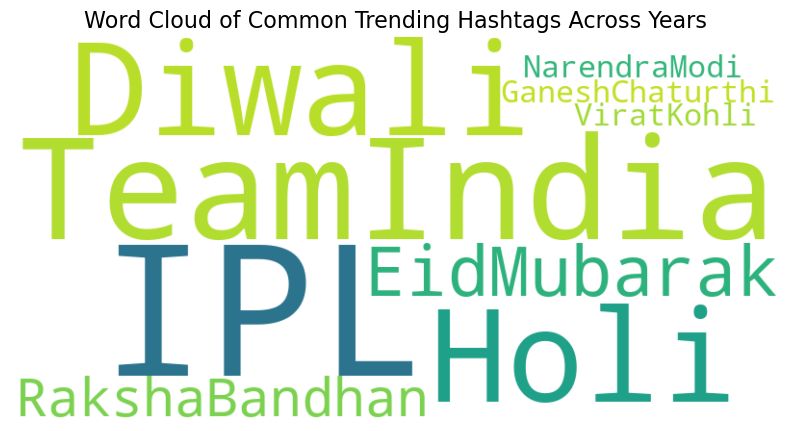

In [24]:


hashtags_string = ' '.join(common_hashtags)  

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(hashtags_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Common Trending Hashtags Across Years', fontsize=16)
plt.show()


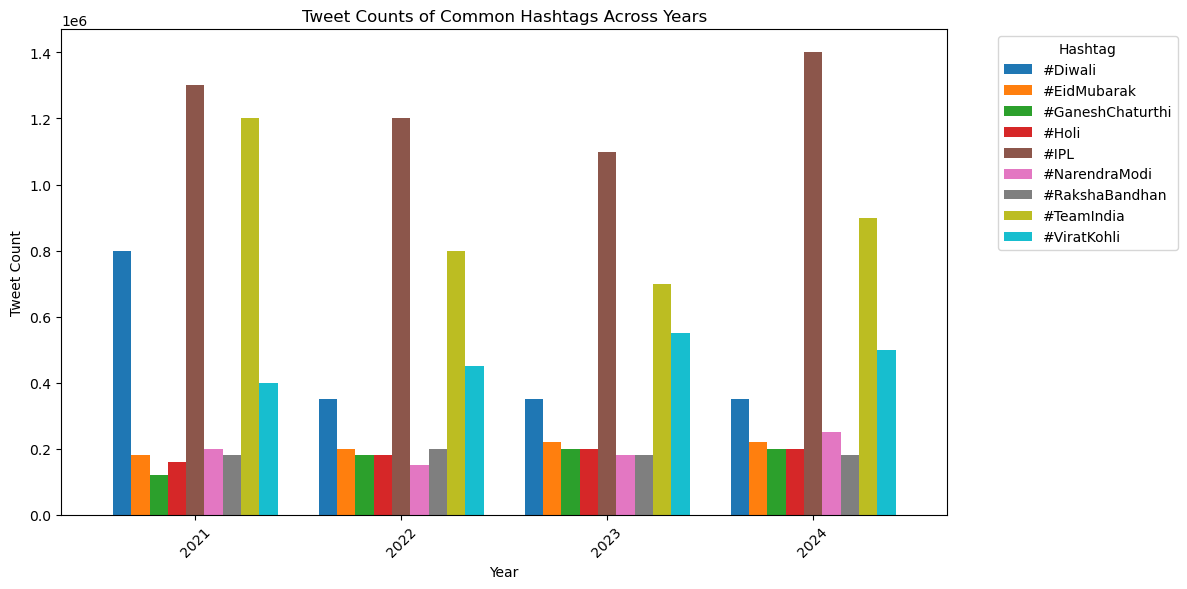

In [14]:
trend_data = data[data['Base_Hashtag'].isin(common_hashtags)]
grouped_data = trend_data.groupby(['Year', 'Base_Hashtag'])['Tweet_Count'].sum().unstack()

grouped_data.plot(kind='bar', figsize=(12, 6), colormap='tab10', width=0.8)
plt.title('Tweet Counts of Common Hashtags Across Years')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.legend(title='Hashtag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


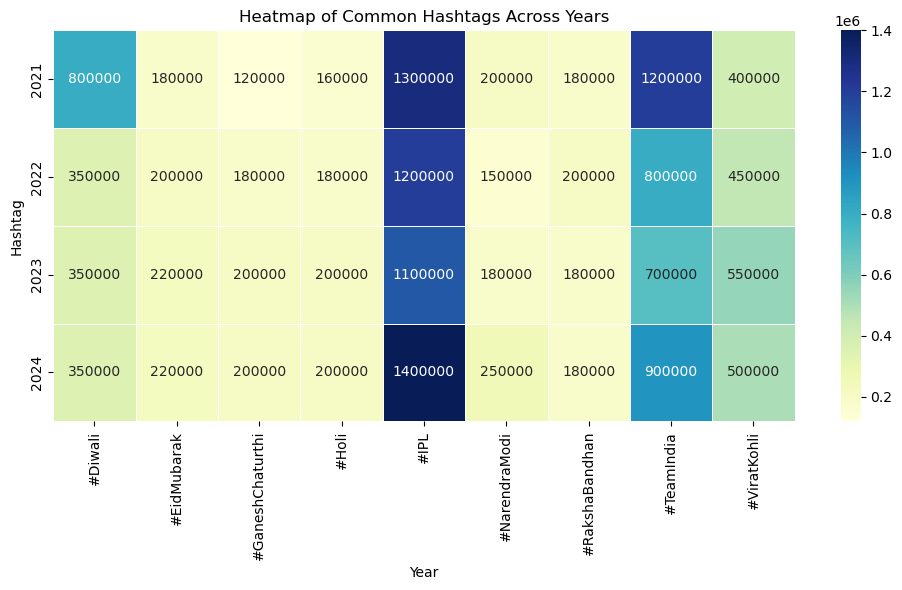

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Common Hashtags Across Years')
plt.xlabel('Year')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()


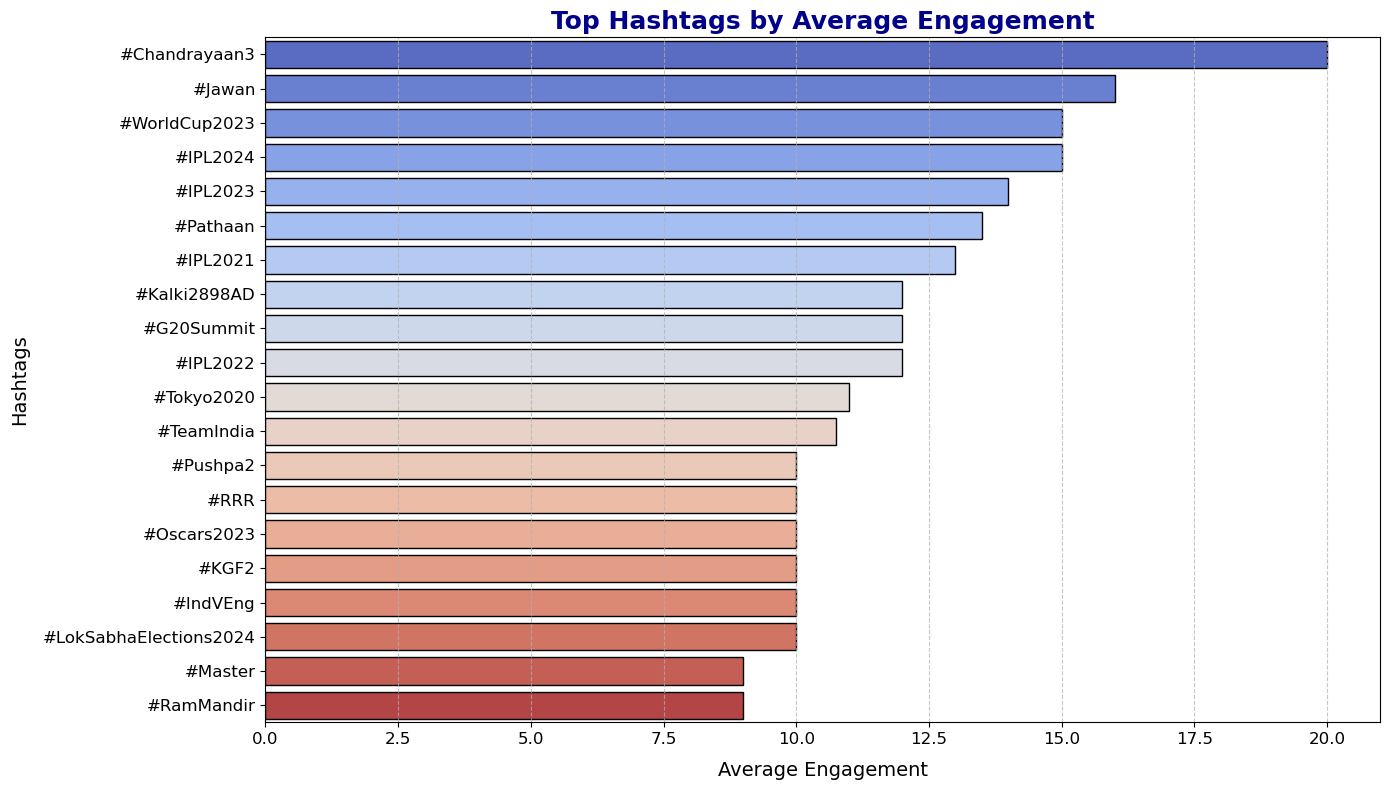

In [33]:
# hashtag_engagement = data.groupby('Hashtag')['Engagement'].mean().sort_values(ascending=False)

# # Plot Average Engagement per Hashtag
# plt.figure(figsize=(12, 6))
# sns.barplot(x=hashtag_engagement.index, y=hashtag_engagement.values, palette='viridis')
# plt.title('Average Engagement per Hashtag')
# plt.ylabel('Average Engagement')
# plt.xlabel('Hashtag')
# plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns


hashtag_engagement = data.groupby('Hashtag')['Engagement'].mean().sort_values(ascending=False)


top_n = 20  
hashtag_engagement = hashtag_engagement.head(top_n)


plt.figure(figsize=(14, 8))  
sns.barplot(
    x=hashtag_engagement.values,
    y=hashtag_engagement.index,
    palette='coolwarm',  
    edgecolor='black'  
plt.title('Top Hashtags by Average Engagement', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Average Engagement', fontsize=14, labelpad=10)
plt.ylabel('Hashtags', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


# TOP TRENDS TOTAL TWEETS ACROSS YEARS 

In [17]:
# 2. Top Tweets by Count Across Years
top_tweets = data.groupby(['Year', 'Hashtag'])['Tweet_Count'].sum().reset_index()
top_tweets = top_tweets.sort_values(['Year', 'Tweet_Count'], ascending=[True, False])

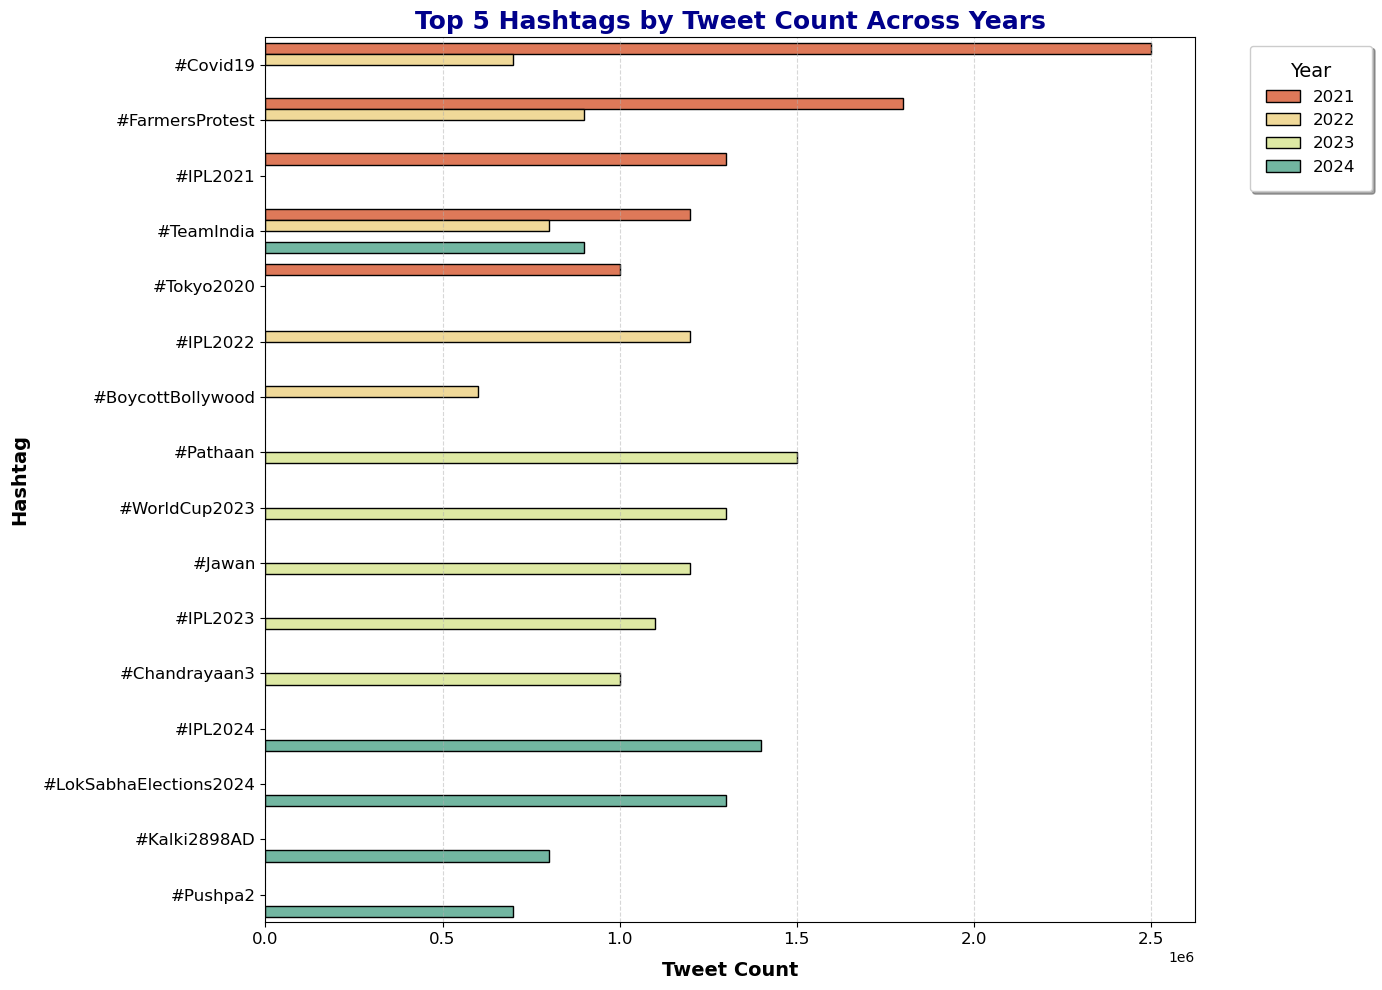

In [18]:

top_5_tweets = top_tweets.groupby('Year').head(5)


plt.figure(figsize=(14, 10))  
sns.barplot(
    x='Tweet_Count', y='Hashtag', hue='Year', data=top_5_tweets,
    palette='Spectral', edgecolor='black' 
)

plt.title('Top 5 Hashtags by Tweet Count Across Years', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Tweet Count', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Hashtag', fontsize=14, labelpad=10, fontweight='bold')


plt.legend(
    title='Year', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left',
    frameon=True, shadow=True, borderpad=1
)


plt.grid(axis='x', linestyle='--', alpha=0.5)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  


plt.show()


# TOP HASTAGS BY MOVIES

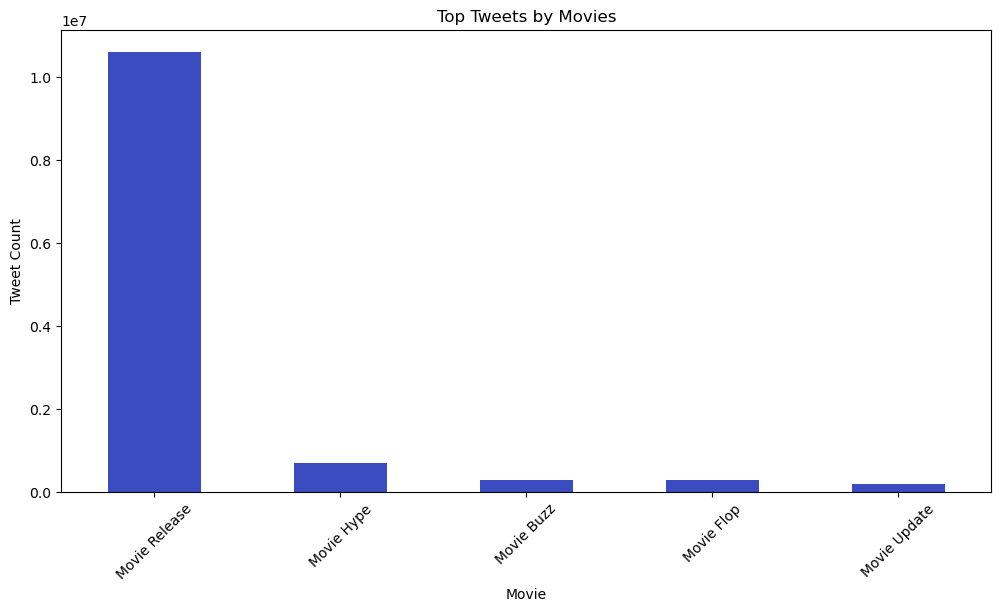

In [19]:

movie_tweets = data[data['Event Trigger'].str.contains('Movie', na=False)]
movie_top = movie_tweets.groupby('Event Trigger')['Tweet_Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
movie_top[:10].plot(kind='bar', colormap='coolwarm')
plt.title('Top Tweets by Movies')
plt.xlabel('Movie')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()


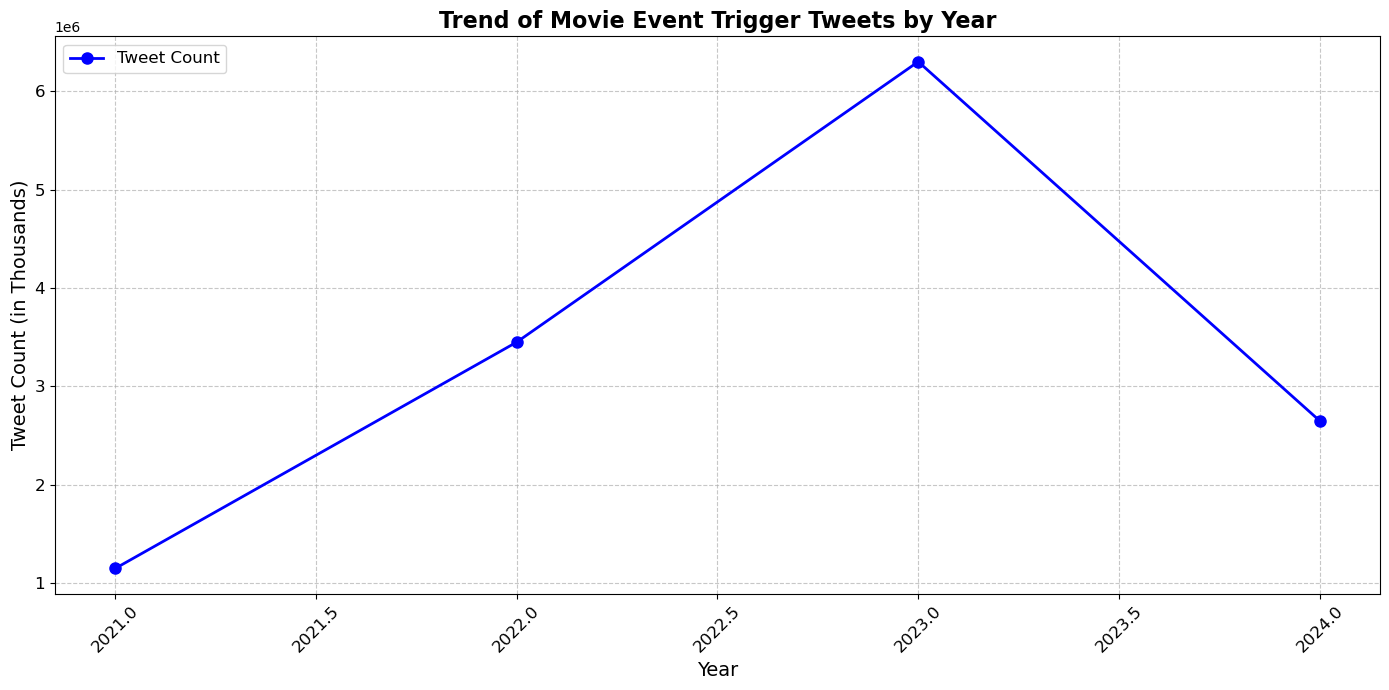

In [31]:

movie_keywords = ['Movie Flop', 'Movie Release', 'Movie Hype', 'Teaser Release', 'Movie Hype', 'Movie Buzz', 'Trailer Release',
                  'First Look Release', 'Film Promotion', ]


# movie_tweets = data[data['Event Trigger'].str.contains('|'.join(movie_keywords), case=False, na=False)]
# movie_event_counts = movie_tweets.groupby('Year')['Tweet_Count'].sum()

movie_tweets = data[data['Event Trigger'].str.contains('|'.join(movie_keywords), case=False, na=False)]


movie_tweets = movie_tweets[movie_tweets['Year'].astype(float) % 1 == 0]  # Retain only whole years


movie_event_counts = movie_tweets.groupby('Year')['Tweet_Count'].sum()


plt.figure(figsize=(14, 7))  
plt.plot(
    movie_event_counts.index, movie_event_counts.values,
    marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Tweet Count'
)
plt.title('Trend of Movie Event Trigger Tweets by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tweet Count (in Thousands)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()




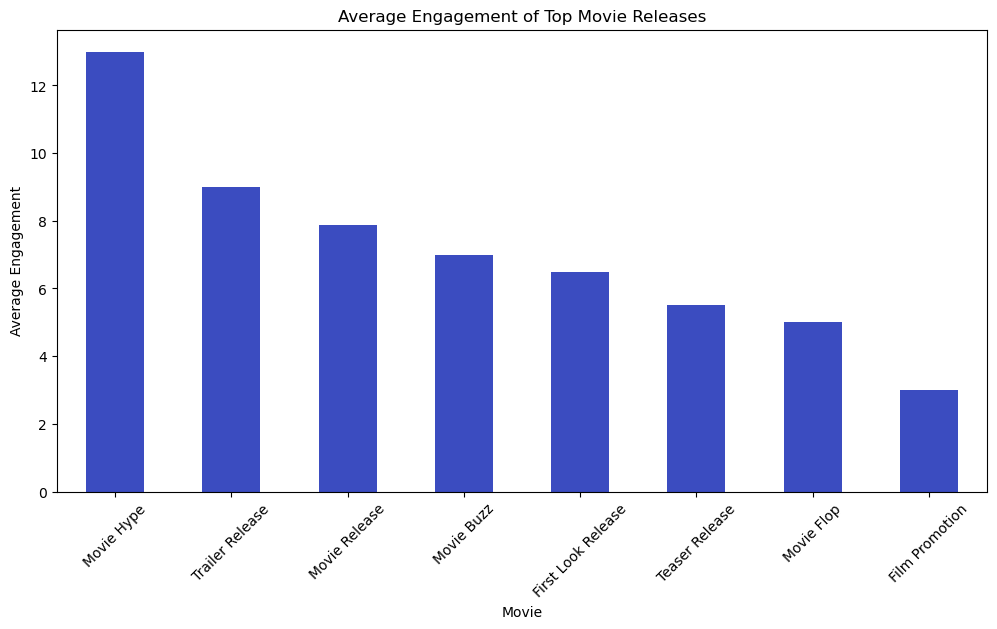

In [32]:

movie_tweets['Engagement'] = movie_tweets['Engagement'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)


movie_engagement_avg = movie_tweets.groupby('Event Trigger')['Engagement'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
movie_engagement_avg[:10].plot(kind='bar', colormap='coolwarm')
plt.title('Average Engagement of Top Movie Releases')
plt.xlabel('Movie')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x700 with 0 Axes>

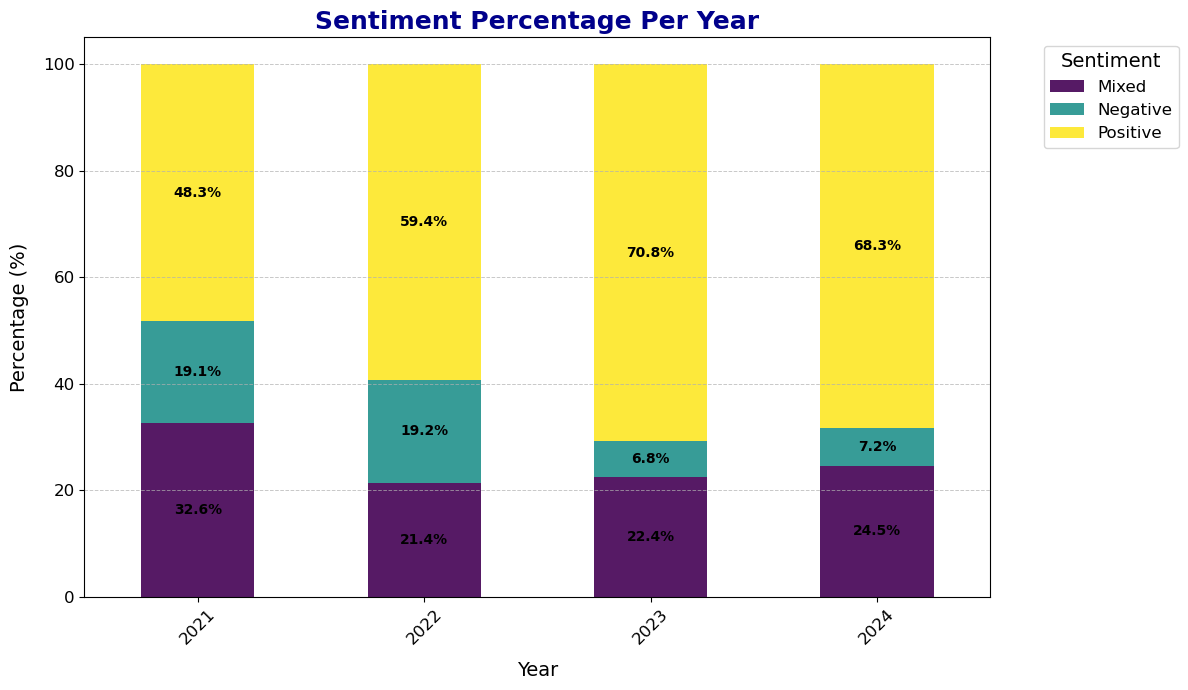

In [12]:



sentiment_percent = data.pivot_table(values='Tweet_Count', index='Year', columns='Sentiment', aggfunc='sum')
sentiment_percent = (sentiment_percent.div(sentiment_percent.sum(axis=1), axis=0) * 100).fillna(0)  # Convert to percentages


plt.figure(figsize=(12, 7))  
ax = sentiment_percent.plot(
    kind='bar', stacked=True, colormap='viridis', alpha=0.9, figsize=(12, 7)  
)


plt.title('Sentiment Percentage Per Year', fontsize=18, fontweight='bold', color='darkblue')
plt.ylabel('Percentage (%)', fontsize=14, labelpad=10)
plt.xlabel('Year', fontsize=14, labelpad=10)


plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


plt.legend(title='Sentiment', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))


for i in ax.patches:  
    height = i.get_height() 
    if height > 0:  
        ax.annotate(
            f'{height:.1f}%',  
            (i.get_x() + i.get_width() / 2, i.get_y() + height / 2),  
            ha='center', va='center', fontsize=10, color='black', fontweight='bold'
        )


plt.tight_layout()
plt.show()
